**Project Name : Financial Analysis of Gartner Inc.**

**Group Number:** 3

**Group Members:**

* Harsimranjit Kaur - 0812147
* Hewa Alegdage Nidula Chithwara – 0829169
* Jashanpreet Sharma – 0796557
* Shraddhaba Bharatsinh Jadeja - 0830445

# Importing Libraries

In [57]:
# Basic data modulation and visualization packages
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical computations
import seaborn as sns  # Importing seaborn for statistical data visualization
from pandas_datareader import data as wb  # Importing pandas_datareader for fetching financial data
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import warnings  # Importing warnings to suppress any warnings
warnings.filterwarnings("ignore")  # Ignore warnings
import textwrap
from IPython.display import display, Markdown
from matplotlib.ticker import StrMethodFormatter
from prophet import Prophet


# Stock data and time series management packages
import yfinance as yf  # Importing yfinance for fetching stock data
import datetime  # Importing datetime module for date and time manipulation
from datetime import datetime as dt, timedelta  # Importing datetime module for date and time manipulation

# Fetching Stock Information

In [2]:
stock = 'IT'
ticker = yf.Ticker(stock)

stock_name = ticker.info['longName']
business_summary = ticker.info['longBusinessSummary']

formatted_text = f"**Stock Name:** {stock_name}\n\n**Long Business Summary:**\n{textwrap.fill(business_summary, width=200)}"
display(Markdown(formatted_text))


**Stock Name:** Gartner, Inc.

**Long Business Summary:**
Gartner, Inc. operates as a research and advisory company in the United States, Canada, Europe, the Middle East, Africa, and internationally. It operates through three segments: Research, Conferences,
and Consulting. The Research segment delivers its research primarily through a subscription service that include on-demand access to published research content, data and benchmarks, and direct access
to a network of research experts. The Conferences segment offers executives and teams in an organization the opportunity to learn, share, and network. The Consulting segment offers market-leading
research, custom analysis, and on-the-ground support services. This segment also offers actionable solutions for IT-related priorities, including IT cost optimization, digital transformation, and IT
sourcing optimization. Gartner, Inc. was founded in 1979 and is headquartered in Stamford, Connecticut.

In [3]:
# Retrieving Financial Statement Data
income_statement = ticker.income_stmt
balance_sheet = ticker.balance_sheet
cash_flow = ticker.cashflow

# Profitability Ratios

## 1. Gross Profit Margin(GPM)

In [45]:
GPM = round((income_statement.iloc[:, 0]['Gross Profit'] / income_statement.iloc[:, 0]['Total Revenue']) * 100, 2)
print(f"Gross Profit Margin for {stock_name}: {str(GPM) + '%'}")

Gross Profit Margin for Gartner, Inc.: 67.78%


## 2. Operating Profit Margin(OPM)

In [46]:
OPM = round((income_statement.iloc[:, 0]['Operating Income'] / income_statement.iloc[:, 0]['Total Revenue']) * 100, 2)
print(f"Operating Profit Margin for {stock_name}: {str(OPM) + '%'}")

Operating Profit Margin for Gartner, Inc.: 18.81%


## 3. Return On Assests(ROA)

In [47]:
ROA = round(income_statement.iloc[:, 0]['Net Income'] / balance_sheet.iloc[:, 0]['Total Assets'] * 100, 2)
print(f"Return on Assets for {stock_name}: {str(ROA) + '%'}")

Return on Assets for Gartner, Inc.: 11.26%


## 4. Return On Equity(ROE)

In [48]:
ROE = round(income_statement.iloc[:, 0]['Net Income'] / balance_sheet.iloc[:, 0]['Stockholders Equity'] * 100, 2)
print(f"Return on Equity for {stock_name}: {str(ROE) + '%'}")

Return on Equity for Gartner, Inc.: 129.65%


## 5. Return On Sales(ROS)

In [49]:
ROS = round(income_statement.iloc[:, 0]['Operating Income'] / income_statement.iloc[:, 0]['Total Revenue'] * 100, 2)
print(f"Return on Sales for {stock_name}: {str(ROS) + '%'}")

Return on Sales for Gartner, Inc.: 18.81%


## 6. Return On Investment(ROI)

Now since Gartner Inc mainly focuses on IT consulting and research as its prime offerings, its financial statements lack data on traditional investment costs. Therefore, in the absence of comprehensive investment cost information in the financial statements, it is not feasible to calculate Return on Investment (ROI) for the organization.

# Liquidity Ratios

## 1. Current Ratio

In [50]:
CR = round(balance_sheet.iloc[:, 0]['Current Assets'] / balance_sheet.iloc[:, 0]['Current Liabilities'] , 2)
print(f"Current Ratio of {stock_name}: {CR}")

Current Ratio of Gartner, Inc.: 0.91


## 2. Quick Ratio

Since Gartner Inc.'s primary "product" is knowledge, expertise, and intellectual property rather than tangible goods, they do not have inventory listed on their financial statements. Hence, this focus of the company on providing intellectual capital and expertise rather than physical products makes it impossible to calculate the quick ratio for this company.

## 3. Cash Ratio

In [51]:
CAR = round(balance_sheet.iloc[:, 0]['Cash And Cash Equivalents'] / balance_sheet.iloc[:, 0]['Current Liabilities'] , 2)
print(f"Cash Ratio of {stock_name}: {CAR}")

Cash Ratio of Gartner, Inc.: 0.35


# Price-to-Earning Ratio (P/E)

In [52]:
# MArket value per share as 52.37 from Historical Data
PE = 52.37/income_statement.iloc[:, 0]['Basic EPS']
print(f"P/E Ratio of {stock_name}: {PE}")

P/E Ratio of Gartner, Inc.: 4.688451208594449


# Dividend Payout Ratio

Gartner Inc. does not give dividends to its shareholders. Thus, dividend-based financial ratios such as the Dividend Yield or Dividend Payout Ratio cannot be calculated for the company.

These ratios typically rely on dividend payments as a key component of the calculation. 
The decision not to pay dividend payments indicates a strategic decision to prioritize reinvestment of profits into the business to drive future growth and enhance shareholder value. 

Thus, investors evaluating Gartner Inc. should carefully consider the company's capital allocation strategy, growth prospects, and financial performance before making investment decisions.

# Sustainable Growth Rate

Sustainable Growth Rate (SGR) represents the maximum growth rate a company can achieve given its profitability, asset utilization, financial leverage, and dividend policy. It provides valuable insights into a company's growth potential and helps in making informed strategic decisions through investment analysis.

Now, as established above, Garter Inc. does not pay dividends to its shareholders, subsequently making it impossible to calculate the Sustainable Growth Rate by using the suggested formula that includes a dividend payout ratio.

Suggestively, the investors should consider other factors and financial ratios to know about the financial health of the company before making any investment decisions.


# Debt-to-Equity Ratio

In [53]:
DER = round(balance_sheet.iloc[:, 0]['Total Debt'] / balance_sheet.iloc[:, 0]['Stockholders Equity'] , 2)
print(f"Debt-to-Equity Ratio of {stock_name}: {DER}")

Debt-to-Equity Ratio of Gartner, Inc.: 4.51


# CAPM

In [55]:
# Get current date and start date
start_date = "2013-04-01"
current_date = "2023-03-31"

# Fetch risk-free rate (10-year U.S. Treasury bond)
risk_free_data = yf.download("^TNX", start=start_date, end=current_date)
risk_free_rate = risk_free_data['Adj Close'][-1] / 100

# Fetch stock and market data
stock_data = yf.download(stock, start=start_date, end=current_date)
market_data = yf.download("^GSPC", start=start_date, end=current_date)

# Calculate beta
returns = stock_data['Adj Close'].pct_change().dropna()
market_returns = market_data['Adj Close'].pct_change().dropna()
beta = returns.cov(market_returns) / market_returns.var()

# Calculate geometric mean of market returns
annualized_market_rate = (1 + np.prod(1 + market_returns)) ** (252 / len(market_returns)) - 1

# Calculate CAPM
expected_return_stock = risk_free_rate + beta * (annualized_market_rate - risk_free_rate)

# Display results
print("")
print(f"Risk-Free Rate: {risk_free_rate:.2%}")
print(f"Market Return: {annualized_market_rate:.2%}")
print(f"Beta: {beta:.4f}")
print(f"Expected Return for {stock_name}: {expected_return_stock:.2%}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



Risk-Free Rate: 3.55%
Market Return: 13.66%
Beta: 1.0197
Expected Return for Gartner, Inc.: 13.85%


# Free Cash Flows

In [54]:
FCF = cash_flow.iloc[:, 0]['Operating Cash Flow'] + cash_flow.iloc[:, 0]['Capital Expenditure']
print(f"Free Cash Flows Value of {stock_name}: {FCF}")

Free Cash Flows Value of Gartner, Inc.: 1052613000.0


# WACC

In [39]:
# Acquiring the 'Long Term Debt' element from Balance Sheet
long_term_debt = balance_sheet.iloc[:, 0]['Long Term Debt']
print("")
print(f"Long Term Debt : {long_term_debt}")

# Gathering all the required elements from Income Statement
interest_expense = income_statement.iloc[:, 0]['Interest Expense']
pretax_income = income_statement.iloc[:, 0]['Pretax Income']
net_income = income_statement.iloc[:, 0]['Net Income']

print(f"Interest Expense : {interest_expense}")
print(f"Pre Tax Income : {pretax_income}")
print(f"Net Income : {net_income}")

# Define other required financial variables
risk_free_data = yf.download("^TNX", start=start_date, end=current_date)
risk_free_rate = risk_free_data['Adj Close'][-1] / 100
beta = returns.cov(market_returns) / market_returns.var()
annualized_market_rate = (1 + np.prod(1 + market_returns)) ** (252 / len(market_returns)) - 1

# Calculate interest rate and tax rate
interest_rate = interest_expense / long_term_debt
tax_rate = (pretax_income - net_income) / net_income

print(f"Interest Rate : {interest_rate:.2%}")
print(f"Tax Rate : {tax_rate:.2%}")

# Calculate cost of debt
cost_of_debt = interest_rate * (1 - tax_rate)

# Calculate cost of equity using CAPM
cost_of_equity = risk_free_rate + (beta * (annualized_market_rate - risk_free_rate))

# Calculate equity weight
equity_weight = balance_sheet.iloc[:, 0]["Stockholders Equity"] / (balance_sheet.iloc[:, 0]["Stockholders Equity"] + balance_sheet.iloc[:, 0]['Total Liabilities Net Minority Interest'])

# Calculate WACC
wacc = (equity_weight * cost_of_equity) + ((1 - equity_weight) * cost_of_debt)

# Display the results
print(f"Cost of Debt of {stock_name}: {cost_of_debt:.2%}")
print(f"Equity Weight of {stock_name}: {equity_weight:.2%}")
print(f"Cost of Equity of {stock_name}: {cost_of_equity:.2%}")
print(f"Weighted Average Cost of Capital of {stock_name}: {wacc:.2%}")


Long Term Debt : 2448696000.0
Interest Expense : 132772000.0
Pre Tax Income : 1147129000.0
Net Income : 882466000.0


[*********************100%%**********************]  1 of 1 completed

Interest Rate : 5.42%
Tax Rate : 29.99%
Cost of Debt of Gartner, Inc.: 3.80%
Equity Weight of Gartner, Inc.: 8.69%
Cost of Equity of Gartner, Inc.: 13.84%
Weighted Average Cost of Capital of Gartner, Inc.: 4.67%


# Graphical Representation of the Last One-year Stock Prices

[*********************100%%**********************]  1 of 1 completed


<Figure size 2000x800 with 0 Axes>

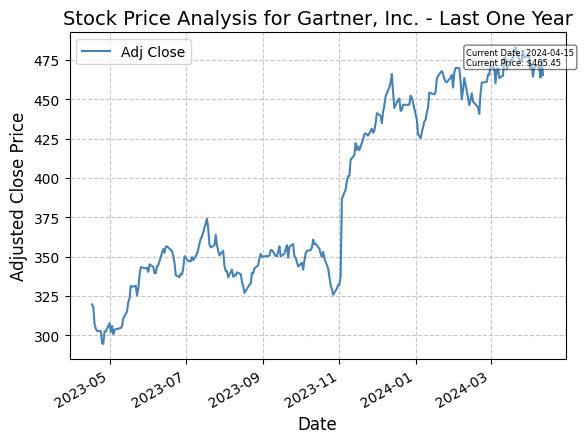

In [26]:
# Downloading data for the stock
data = yf.download(stock, start=(datetime.date.today() - datetime.timedelta(days=365)).strftime("%Y-%m-%d"))['Adj Close'].to_frame()

current_date = datetime.date.today().strftime("%Y-%m-%d")

# Get the current stock price
current_price = data.iloc[-1].iloc[0]

# Ensure this is the first command for plotting to set the size
plt.figure(figsize=(20, 8))

# Plotting the data
data.plot(label=stock, color='steelblue')

# Adding gridlines, title, labels, annotation, and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Stock Price Analysis for {stock_name} - Last One Year", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Close Price", fontsize=12)
plt.annotate(f"Current Date: {current_date}\nCurrent Price: ${current_price:.2f}",
             xy=(0.8, 0.9), xycoords='axes fraction', fontsize=6,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.5))
plt.legend()

# Show the plot
plt.show()

# Monte Carlo Simulation

[*********************100%%**********************]  1 of 1 completed


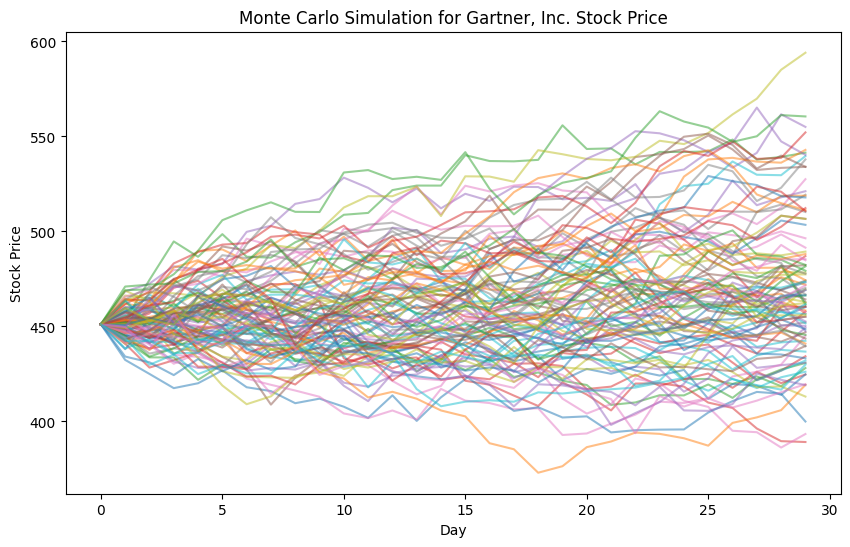

In [27]:
# Get historical stock data
stock_data = yf.download(stock, start="2023-01-01", end="2024-01-01")

# Calculate daily returns
stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()

# Calculate mean and standard deviation of daily returns
mean_daily_return = stock_data['Daily Return'].mean()
std_daily_return = stock_data['Daily Return'].std()

# Set the number of simulations and forecast period
num_simulations = 100
forecast_period = 30

# Set initial stock price as the last known closing price
initial_price = stock_data['Adj Close'][-1]

# Perform Monte Carlo simulation
simulated_prices = np.zeros((forecast_period, num_simulations))
for i in range(num_simulations):
    prices = [initial_price]
    for day in range(1, forecast_period):
        price_t = prices[-1]
        daily_return = np.random.normal(mean_daily_return, std_daily_return)
        price_t1 = price_t * (1 + daily_return)
        prices.append(price_t1)
    simulated_prices[:, i] = prices

# Plot simulations with multiple colors
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(simulated_prices[:, i], alpha=0.5)

plt.title('Monte Carlo Simulation for Gartner, Inc. Stock Price')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.show()

# FB Prophet Analysis

[*********************100%%**********************]  1 of 1 completed
13:08:12 - cmdstanpy - INFO - Chain [1] start processing
13:08:14 - cmdstanpy - INFO - Chain [1] done processing


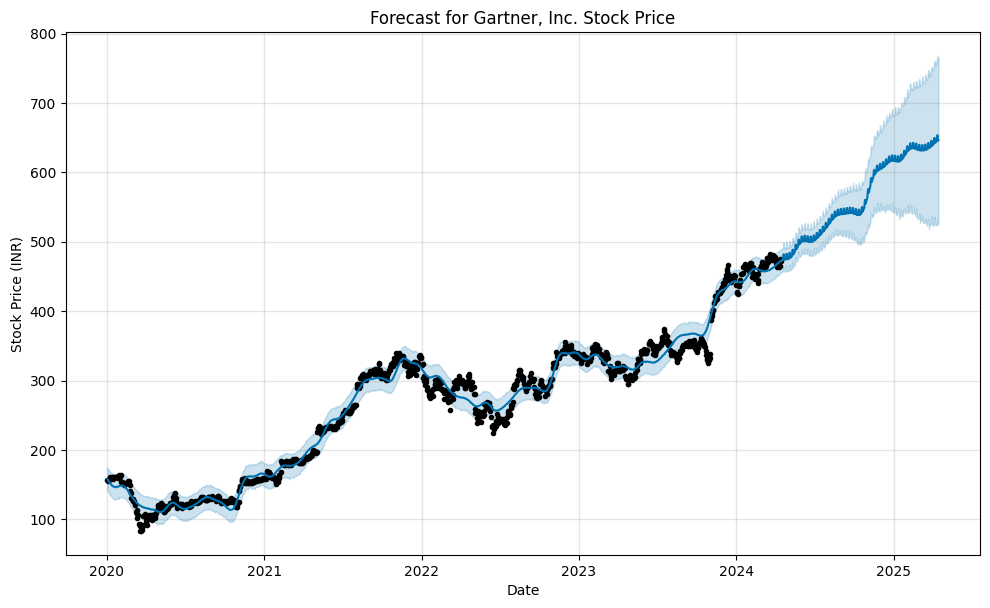

In [58]:
# Fetch historical stock price data for Gartner, Inc. from Yahoo Finance
data = yf.download('IT', start='2020-01-01')

# Reset index to make Date a column
data.reset_index(inplace=True)

# Prepare data for Prophet
data = data.rename(columns={'Date': 'ds', 'Close': 'y'})
data = data[['ds', 'y']]  # Select only Date and Close columns

# Initialize Prophet model
model = Prophet()

# Fit the model to the data
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecasting for one year into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast for Gartner, Inc. Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.show()
